In [210]:
from dotenv import load_dotenv
import os
import pandas as pd
load_dotenv()
import matplotlib.ticker as mtick
import pickle
import seaborn as sns

In [211]:
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import Query

In [212]:
start_date = "2023-07-03 00:00:00"
end_date = "2023-07-09 00:00:00"

queries = {
    "tvl": Query(
        name="tvl",
        query_id=2497839,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
            QueryParameter.date_type("digest_end_date", end_date),
        ]
    ),
    "netDepositGrowthLeaders": Query(
        name="netDepositGrowthLeaders",
        query_id=2393989,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
            QueryParameter.date_type("digest_end_date", end_date),
        ]
    ),
    "stETHApr": Query(
        name="stETHApr",
        query_id=2404762,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
        ],
    ),
    "stEthToEth": Query(
        name="stEthToEth",
        query_id=2198571,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
        ],
    ),
    "dexLiquidityReserves": Query(
        name="dexLiquidityReserves",
        query_id=2706963,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
            QueryParameter.date_type("digest_end_date", end_date),
        ],
    ),
    "stEthOnL2": Query(
        name="stEthOnL2",
        query_id=2709470,
        params=[
            QueryParameter.date_type("digest_start_date", start_date),
            QueryParameter.date_type("digest_end_date", end_date),
        ]
    ),
}

In [214]:

def get_query_result(query_name, cluster="medium"):
    query = queries[query_name]

    dune = DuneClient(os.environ["DUNE_API_KEY"])
    pd = dune.refresh_into_dataframe(query, performance=cluster)
    return pd


In [137]:
dfs = {}

In [138]:
for query_name in queries.keys():
    if query_name == "dexLiquidityReserves":
        dfs[query_name] = get_query_result(query_name, cluster="large")
    else:
        dfs[query_name] = get_query_result(query_name)

2023-07-12 17:07:17,866 INFO dune_client.base_client executing 2497839 on medium cluster
2023-07-12 17:07:18,733 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:24,148 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:29,572 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:34,999 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:40,414 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:45,883 INFO dune_client.base_client waiting for query execution 01H55YW24JQN61JCPBYXGGAMQB to complete: ExecutionState.EXECUTING
2023-07-12 17:07:51,287 INFO dune_c

In [139]:
import pickle

with open("dune_data.pkl", "wb") as f:
    pickle.dump(dfs, f)

In [151]:
for (query_name, df) in dfs.items():
    print(query_name)
    print(df)
    print(queries[query_name].url())

tvl
      chain           TVL        Tokens deposited  TVL change, %  \
0     Total  1.432821e+10                   <nil>  -2.517678e-02   
1  Ethereum  1.418994e+10  7.6137316965472195e+06  -2.831746e-02   
2   Polygon  9.553089e+07  1.3872580504174405e+08   7.788315e-03   
3    Solana  4.274000e+07                   2e+06   2.194044e+06   

       Deposits change, % Token price change, %  
0                   <nil>                 <nil>  
1    0.010821369406030401  -0.03871982669692586  
2  -0.0010568757100081205  0.008854548943943996  
3            1.999999e+06   0.09702258726899382  
https://dune.com/queries/2497839?digest_start_date=2023-07-03+00%3A00%3A00&digest_end_date=2023-07-09+00%3A00%3A00
netDepositGrowthLeaders
            name  row  eth_deposited  eth_withdrawn  eth_deposits_growth  \
0           Lido    1        83008.0   10495.864255         72512.135745   
1   Unidentified    2        44117.0    5055.343105         39061.656895   
2       Coinbase    3        42848.0  

In [80]:
print(dfs["tvl"])

      chain           TVL        Tokens deposited  TVL change, %  \
0     Total  1.447644e+10                   <nil>  -1.509221e-02   
1  Ethereum  1.433234e+10   7.619128780799563e+06  -1.856615e-02   
2   Polygon  1.014536e+08  1.3770535881276992e+08   7.026899e-02   
3    Solana  4.264000e+07                   2e+06   2.188911e+06   

      Deposits change, %  Token price change, %  
0                  <nil>                  <nil>  
1   0.011537902153989865  -0.029760676707241585  
2  -0.008404951605726296    0.07934080197835569  
3           1.999999e+06    0.09445585215605745  


In [155]:
def process_tvl(df: pd.DataFrame) -> str:
    # Select the row corresponding to 'Total'
    total_row = df[df['chain'] == 'Total']

    # Extract the 'TVL' and 'TVL change, %' from the total row
    total_tvl = total_row['TVL'].values[0]
    total_tvl_change = total_row['TVL change, %'].values[0] * 100

    # Format the total TVL and total TVL change into strings
    total_tvl_str = f"${total_tvl / 1e9:.2f}b"
    total_tvl_change_str = f"{total_tvl_change:.2f}%"

    # Select the rows corresponding to 'Ethereum' and 'Polygon'
    eth_row = df[df['chain'] == 'Ethereum']
    polygon_row = df[df['chain'] == 'Polygon']

    # Extract the 'Token price change, %' from the Ethereum and Polygon rows
    eth_price_change = float(eth_row['Token price change, %'].values[0]) * 100
    polygon_price_change = float(polygon_row['Token price change, %'].values[0]) * 100

    # Format the Ethereum and Polygon price changes into strings
    eth_price_change_str = f"{eth_price_change:.2f}%"
    polygon_price_change_str = f"{polygon_price_change:.2f}%"

    # Combine everything into a result string
    result_string = (
        f"TVL: {total_tvl_str}\n"
        f"TVL Percentage Change: {total_tvl_change_str}\n"
        f"Ethereum Token Price Change: {eth_price_change_str}\n"
        f"Polygon Token Price Change: {polygon_price_change_str}"
    )

    return result_string



def process_netDepositGrowthLeaders(df: pd.DataFrame) -> str:
    # Find the row where 'name' is 'Lido'
    lido_row = df.loc[df['name'] == 'Lido']

    # Get the amount of Ethereum that Lido deposited, and format it with 2 decimal places
    eth_deposited = lido_row['eth_deposited'].values[0]
    eth_deposited_formatted = "{:.2f}".format(eth_deposited)

    # Get Lido's ranking in the leaderboard
    lido_ranking = lido_row['row'].values[0]

    # Format the results into a string
    result_string = f"Lido ETH Deposited: {eth_deposited_formatted}\nLido Leaderboard Rank: {lido_ranking}"

    return result_string

def process_stETHApr(df: pd.DataFrame) -> str:
    # Get the most recent 7d moving average
    recent_7d_ma = df['stakingAPR_ma_7'].values[0]
    
    # Convert the value to percentage and format it with 2 decimal places
    recent_7d_ma_percentage = "{:.2%}".format(recent_7d_ma)

    # Format the result into a string
    result_string = f"7d MA: {recent_7d_ma_percentage}"

    return result_string

def process_stEthToEth(df: pd.DataFrame) -> str:
    # Get the most recent weight_avg_price
    recent_avg_price = df['weight_avg_price'].values[0]
    
    # Format the result into a string with 6 decimal places
    result_string = f"stETH/ETH price: {recent_avg_price:.6f}"

    return result_string


def process_dexLiquidityReserves(df: pd.DataFrame) -> str:
    # Select the row corresponding to 'total'
    total_row = df[df['token'] == 'total']
    
    # Extract the 'end value' and 'period_change' from this row
    end_value = total_row['end value'].values[0]
    period_change = total_row['period_change'].values[0]

    # Format the end value into a string in billions with 2 decimal places
    end_value_str = f"${end_value / 1e9:.2f}b"

    # Format the period change into a string as a percentage with 2 decimal places
    period_change_str = f"{period_change * 100:.2f}%"

    # Combine these into a result string
    result_string = f"Total End Value: {end_value_str}\nPeriod Change: {period_change_str}"

    return result_string

def process_stEthOnL2(df: pd.DataFrame) -> str:
    # Select the row corresponding to 'total'
    total_row = df[df['bridge'] == 'total']

    # Extract the 'end_amount' and 'period_change' from the total row
    total_end_amount = total_row['end_amount'].values[0]
    total_period_change = total_row['period_change'].values[0]

    # Format the total end amount and total period change into strings
    total_end_amount_str = f"{total_end_amount:.0f} wstETH"
    total_period_change_str = f"{total_period_change:.2f}%"

    # Initialize an empty string to store the individual bridge data
    bridge_data_str = ""

    # Loop over the rows of the DataFrame
    for i, row in df.iterrows():
        # Skip the total row
        if row['bridge'] == 'total':
            continue

        # Extract the 'bridge', 'end_amount' and 'period_change' for each row
        bridge = row['bridge']
        end_amount = row['end_amount']
        period_change = row['period_change']

        # Format the end amount and period change into strings
        end_amount_str = f"{end_amount:.0f} wstETH"
        period_change_str = f"{period_change:.2f}%"

        # Append this bridge's data to the bridge data string
        bridge_data_str += f"{bridge}: {end_amount_str} (7d: {period_change_str})\n"

    # Combine the total and bridge data into a result string
    result_string = f"The amount of wstETH on L2 grew by {total_period_change_str}, hitting {total_end_amount_str}:\n\n{bridge_data_str}"

    return result_string

# Define a dictionary mapping the DataFrame names to their respective processing functions
process_functions = {
    "tvl": process_tvl,
    "netDepositGrowthLeaders": process_netDepositGrowthLeaders,
    "stETHApr": process_stETHApr,
    "stEthToEth": process_stEthToEth,
    "dexLiquidityReserves": process_dexLiquidityReserves,
    "stEthOnL2": process_stEthOnL2
}


In [142]:
res = {}

# Loop through each DataFrame in your dfs dictionary
for df_name, df in dfs.items():
    # Get the corresponding processing function from the process_functions dictionary
    process_func = process_functions.get(df_name)
    # If a processing function exists, apply it to the DataFrame
    if process_func is not None:
        s = process_func(df)
        res[df_name] = s

In [143]:
for k, v in res.items():
    print(k)
    print(v)
    print()

tvl
TVL: $14.33b
TVL Percentage Change: -2.52%
Ethereum Token Price Change: -3.87%
Polygon Token Price Change: 0.89%

netDepositGrowthLeaders
Lido ETH Deposited: 83008.00
Lido Leaderboard Rank: 1

stETHApr
7d MA: 3.95%

stEthToEth
stETH/ETH price: 0.999700

dexLiquidityReserves
Total End Value: $0.62b
Period Change: -10.81%

stEthOnL2
The amount of wstETH on L2 grew by 2.94%, hitting 119636 wstETH:

Arbitrum Bridges: 69558 wstETH (7d: 2.95%)
Optimism Bridges: 44945 wstETH (7d: 3.92%)
Polygon Bridges: 5133 wstETH (7d: -5.12%)




In [156]:
with open('dune_data.pkl', 'rb') as f:
    res = pickle.load(f)


In [158]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import (AIMessage, HumanMessage, SystemMessage)


In [159]:
chat = ChatOpenAI(temperature=0, model="gpt-4")

In [160]:
DIGEST_SYSTEM_PROMPT = """
You are a marketing and analytics professional at Lido, a liquid staking solution for Ethereum. Every week, you publish a twitter thread that contains
information about the state of the Lido protocol. Your boss gives you various datasets related to Lido, including the Total Value Locked (TVL), the token price, the APR of stETH, the share of staked eth staked through Lido, the balance of the token pools, and the conversation ratio of stETH to ETH.

Your boss wants you to write a twitter thread for the week. The date today is {DATE}. In the past, you have written the following threads:

Last Weeks Digest: June 26 - July 3, 2023
Lido Weekly Digest - July 3rd 

1/
📈 Lido Analytics: June 26 - July 3, 2023

TLDR:
Lido TVL grew by 3.84% thanks to token price growth and new deposits inflow, ended the week at $14.75b
Lido led in net new deposits to Ethereum Beacon Chain -  total 7d value was 132.8k ETH
AAVE V3 wstETH pool grew rapidly (+9.65%), hit 347.3k wstETH

2/
⚡️Lido TVL

Lido TVL continued its growth to a new peak at $14.75b (7d: +3.84%) as a result of token price growth and new deposits inflow combined.



3/
⚡️ Lido on Ethereum

Lido led in net new deposits to the Ethereum Beacon Chain (new gross deposits - principal withdrawals) - 132.8k ETH in 7 days.



4/
⚡️ stETH APR

stETH APR grew moderately last week, with the 7d MA reaching 3.96%. 



5/ 
🌊 LP: @CurveFinance 

Curve ETH/stETH LP reserves slightly decreased:


ETH: 236,221 (7d: -1.74%)
stETH: 229,030 (7d: -1.58%)


The current rate stETH/ETH exchange rate is 0.9998 (UTC 05:00 July 3).



6/ 
🌊 LP: @AaveAave

V2 stETH pool: 921,857 stETH (7d: -0.76%), 6 liquidations for 22.13 stETH total
V3 wstETH pool: 347,339 wstETH (7d: +9.65%), 0 liquidations

7/ 
🌊 LP: @MakerDAO

Maker wstETH-A: 394,947  (7d: -1.32%), 0 liquidations 
Maker wstETH-B: 536,933 (7d: +0.35%), 0 liquidations

8/ 
🖥️ Lido on L2

The amount of wstETH on L2 is +2.50% up, reaching 111,168 wstETH:

Arbitrum: 64,293 wstETH (7d: +2.06%) 
Optimism: 42,121 wstETH (7d: +3.53%)  
Polygon: 4,755 wstETH (7d: -0.42%) 




9/  
Note that by default the data is presented for Monday, 00:00 UTC (unless otherwise specified), with the change presented for the last 7 days.


10/
Check out the Lido Dashboards Catalogue https://dune.com/lido/lido-dashboards-catalogue to keep up with further Lido developments.

🏝️

------------------------
Other Examples:
Lido Weekly Digest - June 19th 

1/
📈 Lido Analytics: June 12 - June 19, 2023

TLDR:
Lido TVL fell 0.78% as a result of decreasing token prices, ending the week at $12.6b
Lido led in net new deposits to Ethereum Beacon Chain, with a total 7d value of 77.3k ETH.
wstETH on L2 surpassed 100,000 wstETH: currently 106,046 wstETH (7d: +8.54%)

2/
⚡️Lido TVL

Despite deposit growth on both Ethereum and Polygon, total TVL decreased slightly - to $12.6b (7d: -0.78%) - due to token price volatility.



3/
⚡️ Lido on Ethereum

Lido is leading in net new deposits to the Ethereum Beacon Chain (new gross deposits - principal withdrawals) - 77.3k ETH in 7 days.



4/
⚡️ stETH APR

stETH APR decreased last week, with the 7d MA reaching 3.83%. 



5/ 
🌊 LP: @CurveFinance 

Curve ETH/stETH LP reserves shrank, largely due to a cut in incentives:


ETH: 244,464 (-16.13%; UTC 09:00 June 19)
stETH: 239,073 (-17.11%)


The stETH/ETH rate stayed close to the parity varying in the narrow range 0.9985-1.00. The current rate is 0.9999 (UTC 09:00 June 19).



6/ 
🌊 LP: @AaveAave

V2 stETH pool: 895,513 stETH (7d: -6.23%), 1 liquidation for 0.16 stETH
V3 wstETH pool: 299,809 wstETH (7d: +9.84%), 1 liquidation for 0.59 wstETH

7/ 
🌊 LP: @MakerDAO

Maker wstETH-A: 351,730  (7d: +2.41%), 0 liquidations 
Maker wstETH-B: 533,965 (7d: +2.37%), 0 liquidations
Maker steCRV: 52,351 (7d: -28.18%), 0 liquidations

8/ 
🖥️ Lido on L2

⚡ ️ Milestone: wstETH amount on L2 surpassed 100,000 wstETH!


9/ 
🖥️ Lido on L2

The amount of wstETH bridged to L2 grew by +8.54%, reaching 106,046 wstETH:
Arbitrum: 60,858 wstETH (7d: +16.00%) 
Optimism: 40,411 wstETH (7d: -0.13%)  
Polygon: 4,778 wstETH (7d: +0.08%) 



9.1/ 
🖥️ Lido on L2

The main reasons behind the impressive growth of wstETH on @arbitrum include:

An increased supply cap on @AaveAave, from 15k to 18.75k. 100% already supplied by now.
The wstETH pool on @RDNTCapital gaining traction - 16.85k wstETH deposited (7d: +51.06%).



10/  
Note that by default the data is presented for Monday, 00:00 UTC (unless otherwise specified), with the change presented for the last 7 days.


11/
Check out the Lido Dashboards Catalogue https://dune.com/lido/lido-dashboards-catalogue to keep up with further Lido developments.

🏝️


------------------------

Respond only with your Twitter thread text using the above examples as guidelines. Be sure to use the latest information provided by your boss.
Do not make up information, associations, or data. Use only the information provided by your boss. If you do not know the reason for a change, do not include a reason for that point.
Do not use any numbers or any information from the examples provided above. The examples are meant as a guide to the format of the thread, not the specific content.
The digests should not always be the same format, for example, if you don't have data for something that is in an example, you don't need to include it. For example, you should not say "Data for this is not available this week", just skip that section.
Do not include the LP sections if you don't have enough information.
In the first TLDR section, you should include a summary of each section of the thread.
"""

In [161]:
dune_info = ""
for k, v in res.items():
    dune_info += f"{k}: {v}\n"

dune_info += "\n\nWrite a thread with the above information. The current date is July 12th. This digest contains information for the week of July 3rd to July 10th."

digest_user_prompt = HumanMessage(content=dune_info)

In [162]:
thread = chat.predict_messages([SystemMessage(content=DIGEST_SYSTEM_PROMPT.format(DATE="July 12th 2023")), digest_user_prompt])


print(thread.content)


1/
📈 Lido Analytics: July 3 - July 10, 2023

TLDR:
Lido TVL decreased by 2.52% due to a decrease in token prices, ending the week at $14.32b
Lido led in net new deposits to Ethereum Beacon Chain, with a total 7d value of 72.5k ETH.
wstETH on L2 grew by 2.94%: currently 119,635 wstETH

2/
⚡️Lido TVL

Despite deposit growth on Ethereum, total TVL decreased slightly - to $14.32b (7d: -2.52%) - due to token price volatility.

3/
⚡️ Lido on Ethereum

Lido is leading in net new deposits to the Ethereum Beacon Chain (new gross deposits - principal withdrawals) - 72.5k ETH in 7 days.

4/
⚡️ stETH APR

stETH APR decreased last week, with the 7d MA reaching 3.95%.

5/ 
🌊 LP: @CurveFinance 

Curve ETH/stETH LP reserves shrank, largely due to a cut in incentives:

ETH: 567,525 (-10.81%)
stETH: 461,309 (-7.52%)

The stETH/ETH rate stayed close to the parity at 0.9997.

6/ 
🌊 LP: @AaveAave

V2 stETH pool: 695,581 stETH (7d: -3.92%), 1 liquidation for 0.16 stETH
V3 wstETH pool: 449,451 wstETH (7d: +3

In [208]:
def graph_stETHApr(df: pd.DataFrame):
    plt.clf()
    # Ensure that 'time' column is in datetime format
    df['time'] = pd.to_datetime(df['time'])

    # Start a new figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot 'stakingAPR' line
    sns.lineplot(x='time', y='stakingAPR', data=df, label='stakingAPR', ax=ax)

    # Plot 'stakingAPR_ma_7' line
    sns.lineplot(x='time', y='stakingAPR_ma_7', data=df, label='stakingAPR_ma_7', ax=ax)

    # Set plot title and labels
    ax.set_title('stakingAPR and stakingAPR_ma_7 over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Display the legend
    ax.legend()

    # Show the plot
    plt.show()

    # Save the plot to a file in graphs/<end_date> folder. make the folder if it doesn't exist.
    Path(f'graphs/{end_date}').mkdir(parents=True, exist_ok=True)
    fig.savefig(f'graphs/{end_date}/stakingAPR.png')

def graph_netDepositGrowthLeaders(df: pd.DataFrame):
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x="eth_deposits_growth", y="name", data=df, ax=ax)
    ax.set(xlabel='ETH Deposits Growth', ylabel='Protocol')
    ax.set_title('ETH Deposits Growth Leaders')
    plt.show()
    
    # Save the plot to a file in graphs/<end_date> folder. make the folder if it doesn't exist.
    Path(f'graphs/{end_date}').mkdir(parents=True, exist_ok=True)
    fig.savefig(f'graphs/{end_date}/eth_deposits_growth.png')



graphing_functions = {
    "tvl": None,
    "netDepositGrowthLeaders": graph_netDepositGrowthLeaders,
    "stETHApr": graph_stETHApr,
    "stEthToEth": None,
    "dexLiquidityReserves": None,
    "stEthOnL2": None
}

<Figure size 640x480 with 0 Axes>

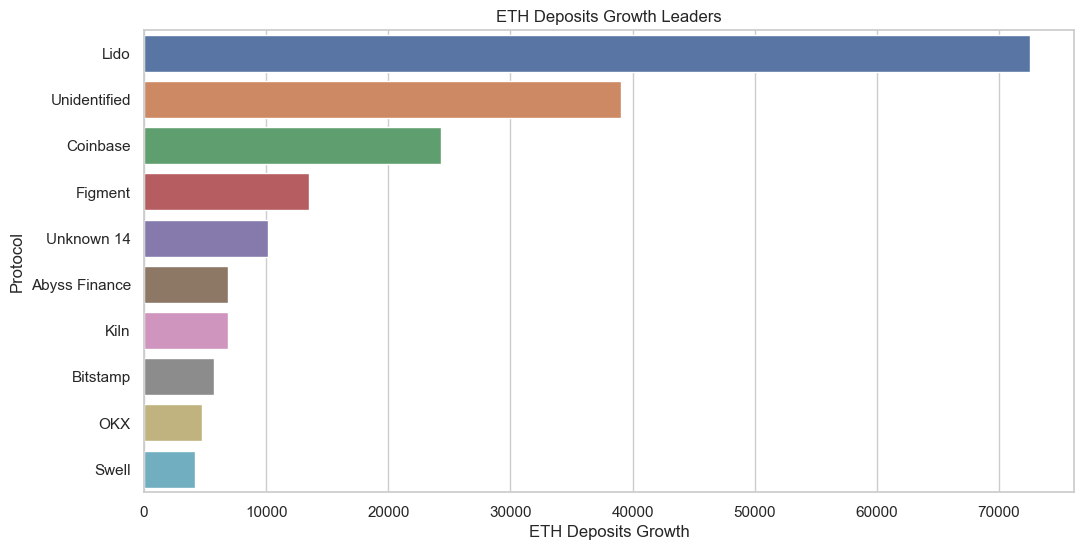

<Figure size 640x480 with 0 Axes>

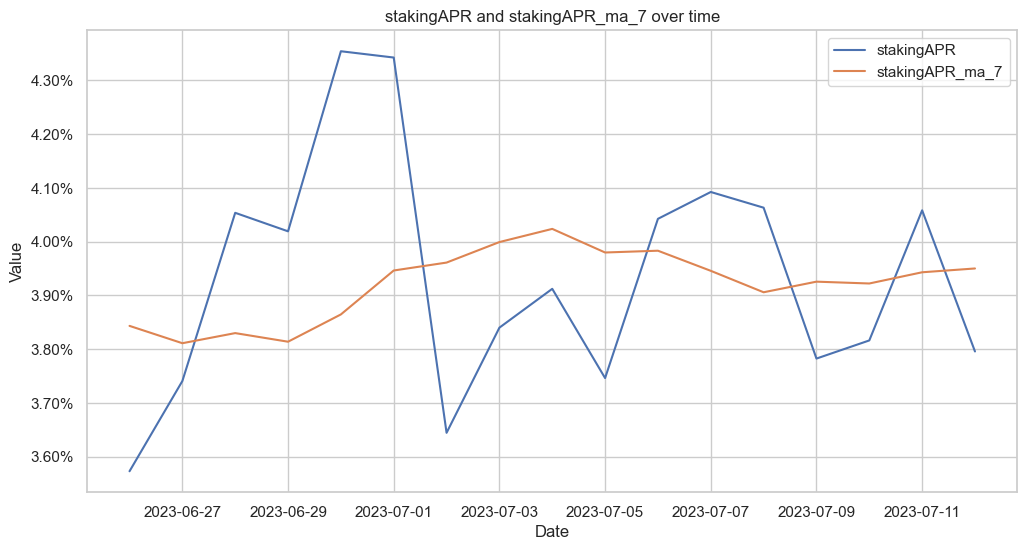

In [209]:
from pathlib import Path
for k, v in res.items():
    if graphing_functions[k] is not None:
        graphing_functions[k](v)

In [215]:
res = get_query_result("netDepositGrowthLeaders")

2023-07-24 19:43:39,326 INFO dune_client.base_client executing 2393989 on medium cluster
2023-07-24 19:43:40,252 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:43:45,681 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:43:51,182 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:43:56,686 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:44:02,134 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:44:07,563 INFO dune_client.base_client waiting for query execution 01H654JZQN55JTCP643ASZ5MEK to complete: ExecutionState.EXECUTING
2023-07-24 19:44:12,992 INFO dune_c

In [216]:
print(res)

                                name  eth_deposited  share_in_new_deposits  \
0                               Lido        83008.0               0.324213   
1                       Unidentified        40032.0               0.156357   
2                           Coinbase        42848.0               0.167356   
3                            Figment        13600.0               0.053119   
4                         Unknown 14        10112.0               0.039496   
5                      Abyss Finance         7296.0               0.028497   
6                               Kiln         6880.0               0.026872   
7                           Bitstamp         5728.0               0.022372   
8                                OKX         4768.0               0.018623   
9                              Swell         4160.0               0.016248   
10   Unknown whale 30 (from Binance)         3648.0               0.014248   
11                            Kraken         7648.0             

In [219]:
def get_lido_stats(df):
    """
    This function calculates the net eth deposit growth for Lido
    and finds Lido's rank in the list of validators.

    Parameters:
    df (DataFrame): The pandas DataFrame containing validator data

    Returns:
    Tuple[float, int]: Lido's net eth deposit growth and their rank
    """

    # Calculate rank by net deposit growth
    df = df.sort_values('eth_deposits_growth', ascending=False)
    df['rank'] = range(1, len(df) + 1)

    # Find Lido's stats
    lido_stats = df[df['name'] == 'Lido']

    # If Lido is not in the list, return None for both values
    if lido_stats.empty:
        return None, None

    lido_net_deposit_growth = round(lido_stats.iloc[0]['eth_deposits_growth'], 2)
    lido_rank = lido_stats.iloc[0]['rank']

    return f"Lido had net deposit growth of {lido_net_deposit_growth} ETH. ETH Growth Leaderboard rank: {lido_rank}"

get_lido_stats(res)

'Lido had net deposit growth of 72512.13574480599 ETH. ETH Growth Leaderboard rank: 1'